## Import Necessary Package

In [140]:
import pymc3 as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az
from scipy import stats
import copy
from scipy import optimize

## If I need to write a function for generate bernoulli data for players, the following is my function (but in the next part I won't use this)

In [ ]:
def bern_sample(num, p):
    result = []
    for i in range(num):
        random_index = np.random.rand() #sample randomly between 0 and 1
        if random_index < p:
            result.append(1)
        else:
            result.append(0)
    return result

## Generate Data & Run the Model for Player 1 (p_initial=0.2)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [theta1]
>Slice: [x1]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 52 seconds.


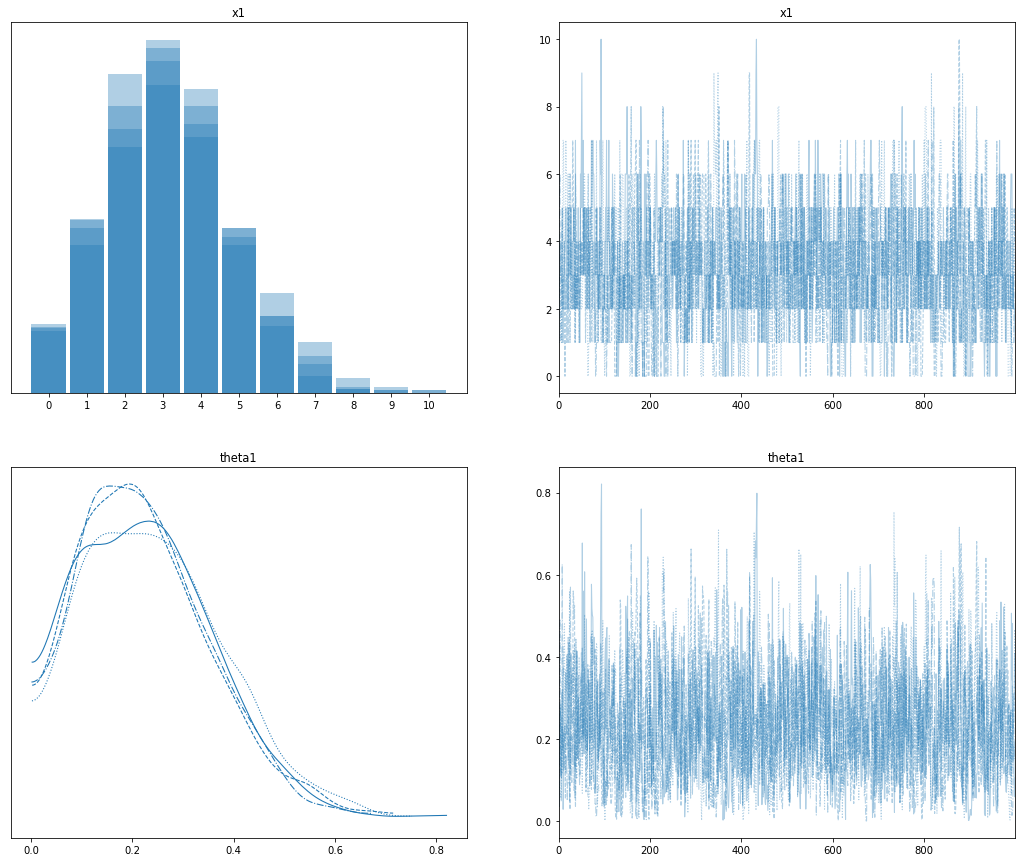

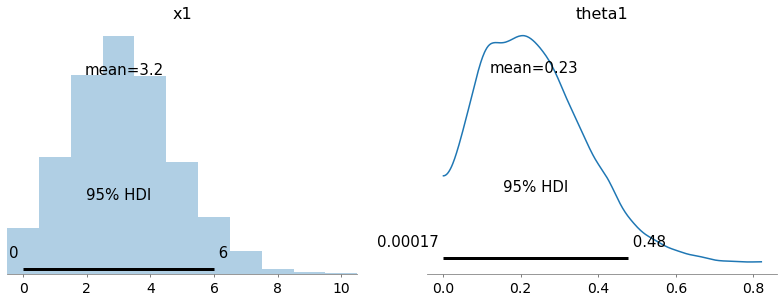

In [347]:
basic_model_1 = pm.Model()
theta1 = 0.2
with basic_model_1:
    x1 = pm.Binomial("x1", n=N1, p=theta1)
    theta1 = pm.Beta("theta1", alpha=1+x1, beta=1+N1-x1)
    step1 = pm.Slice()
    trace1 = pm.sample(1000, step=step1, return_inferencedata=False)
    az.plot_trace(trace1, figsize=(18, 15))
    az.plot_posterior(trace1, hdi_prob=0.95)

## Generate Data & Run the Model for Player 2 (p_initial=0.3)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [theta2]
>Slice: [x2]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 49 seconds.


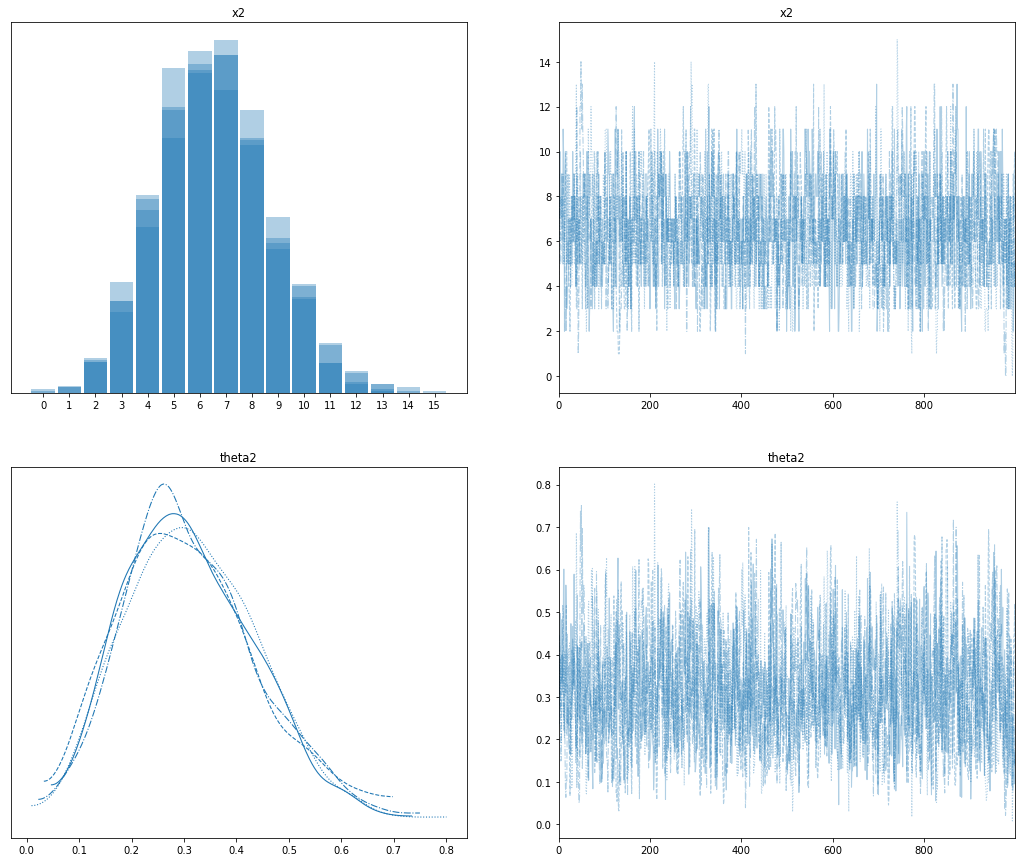

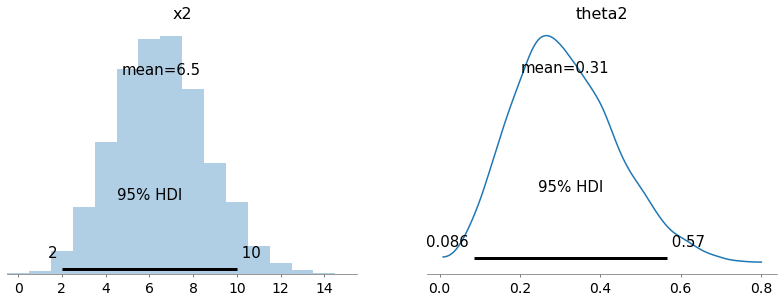

In [345]:
basic_model_2 = pm.Model()
theta2 = 0.3
with basic_model_2:
    x2 = pm.Binomial("x2", n=N2, p=theta2)
    theta2 = pm.Beta("theta2", alpha=1+x2, beta=1+N2-x2)
    step2 = pm.Slice()
    trace2 = pm.sample(1000, step=step2, return_inferencedata=False)
    az.plot_trace(trace2, figsize=(18, 15))
    az.plot_posterior(trace2, hdi_prob=0.95)

## Generate Data & Run the Model for Player 3 (p_initial=0.4)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [theta3]
>Slice: [x3]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 52 seconds.


theta3 ~ Beta


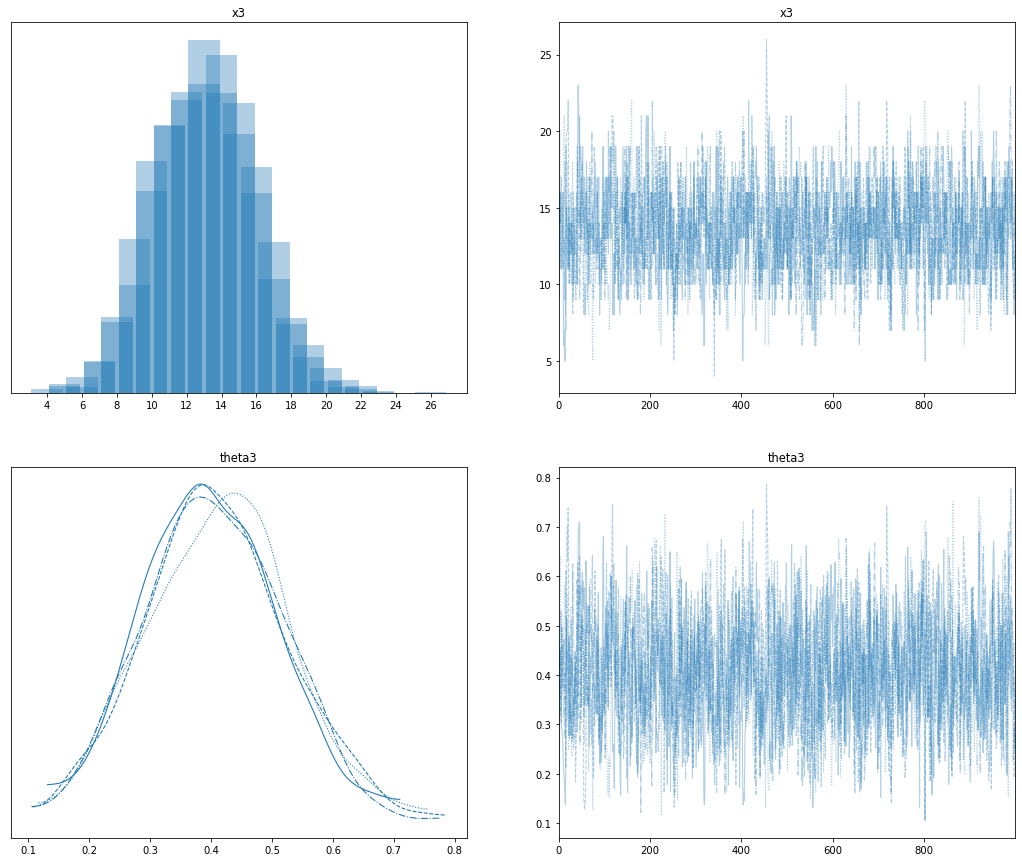

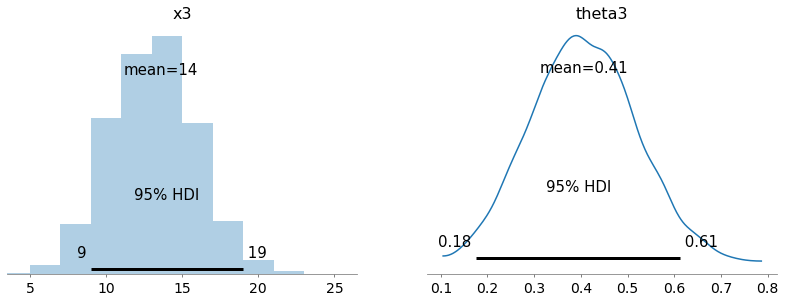

In [275]:
basic_model_3 = pm.Model()
theta3 = 0.4
with basic_model_3:
    x3 = pm.Binomial("x3", n=N3, p=theta3)
    theta3 = pm.Beta("theta3", alpha=1+x3, beta=1+N3-x3)
    step3 = pm.Slice()
    trace3 = pm.sample(1000, step=step3, return_inferencedata=False)
    print(theta3)
    az.plot_trace(trace3, figsize=(18, 15))
    az.plot_posterior(trace3, hdi_prob=0.95)

## Simply Compare the Distributions by Dividing them

<AxesSubplot:title={'center':'x'}>

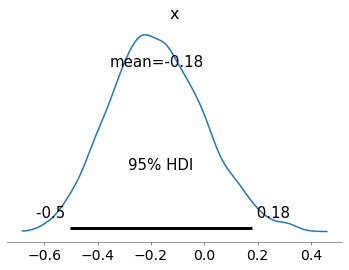

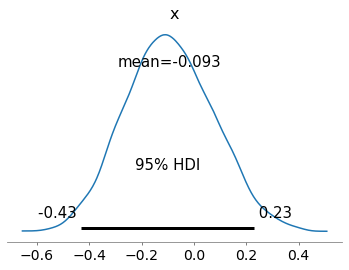

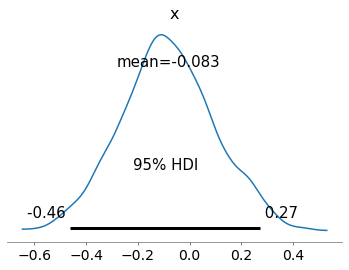

In [346]:
p13 = trace1['theta1']-trace3['theta3']
p23 = trace2['theta2']-trace3['theta3']
p12 = trace1['theta1']-trace2['theta2']
az.plot_posterior(p13, hdi_prob=0.95)
az.plot_posterior(p23, hdi_prob=0.95)
az.plot_posterior(p12, hdi_prob=0.95)

## The Following Part Uses [Kolmogorov–Smirnov Test](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test) to Compare the Distributions Formally

## Compare theta1 and theta2

In [350]:
print(stats.ks_2samp(trace1['theta1'], trace2['theta2']))

KstestResult(statistic=0.25675, pvalue=3.217631675366515e-116)


## Compare theta1 and theta3

In [351]:
print(stats.ks_2samp(trace1['theta1'], trace3['theta3']))

KstestResult(statistic=0.53825, pvalue=0.0)


## Compare theta2 and theta3

In [352]:
print(stats.ks_2samp(trace2['theta2'], trace3['theta3']))

KstestResult(statistic=0.33125, pvalue=1.156468174434244e-194)


### The result shows that the hit rate of player 1 is lower than player 2, and the hit rate of player 2 is lower than player 3